## Corona virus 

### Introduction

The following notebook is a quick visualization of Covid-19 spread out among European countries. In order to make a more effective comparison I decided to normalize the number of cases in each countries with the day passed from the first case registered. The goal is to eventually detect patterns in how different countries are dealing with the contagious

### Setup

In [8]:
import json
import urllib.request
from datetime import date
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=12)
plt.style.use('fivethirtyeight')

### Mining the data

In [14]:
countries = ['germany', 'spain', 'italy', 'france', 'united-kingdom']
df = {}

for country in countries:
    url ='https://api.covid19api.com/dayone/country/' + country
    r = urllib.request.Request(url)
    response = urllib.request.urlopen(r).read().decode('UTF-8')
    data = json.loads(response)
    df_country = pd.DataFrame.from_dict(data)
    df[country] = df_country    
    
for key in df.keys():
    df[key]['Date'] = pd.to_datetime(df[key]['Date'])
    df[key].set_index('Date', inplace = True)
    df[key] = df[key].resample('1D').sum()
    df[key]['Day_passed'] = list(range(1, len(df[key]) + 1))

### Creating the visualization

(25, 200)

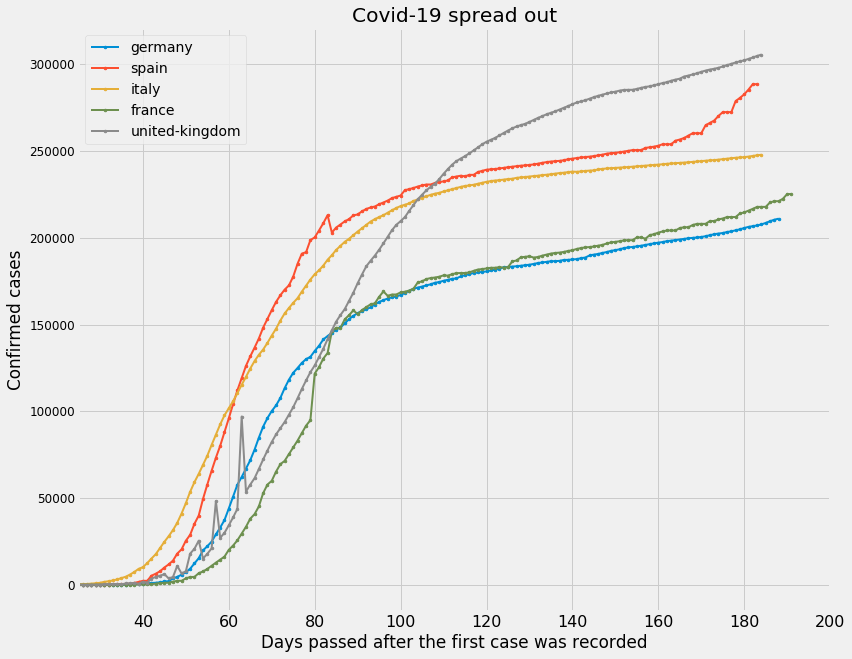

In [19]:
plt.figure(figsize = (12, 10))

for key in df.keys():
    plt.plot(df[key]['Day_passed'], df[key]['Confirmed'], '.-', label = key, linewidth = 2, markersize = 5)
    
plt.legend()
plt.title('Covid-19 spread out')
plt.xlabel('Days passed after the first case was recorded'); plt.ylabel('Confirmed cases')
plt.xlim([25, 200])

### Conclusion

Italy is the country in which the Covid spread out the most in the first 60 days. This can be imputed to the fact that was the first EU country in which the first case was recorded. However, as we can see, It is the only country which manage afterwards to flatten the increase to a logarithmic function. Generally speaking, It seems that the strict measures applied in Italy have led to positive results, however a more accurate analysis should be done with the comparison with the number of test performed